In [9]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains


options = Options()
# options.add_argument('--headless')  # Uncomment for headless mode
driver = webdriver.Chrome(service=Service(), options=options)

genre_urls = {
    'Romance': 'https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&genres=romance',
    'Action': 'https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&genres=action',
    'Music': 'https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&genres=music',
    'Comedy': 'https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&genres=comedy',
    'Animation': 'https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&genres=animation',
    'Adventure': 'https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&genres=adventure',
    'Crime': 'https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31&genres=crime'
}


# --- FUNCTION TO CLICK "LOAD MORE" ---
def click_load_more():
    try:
        load_more_button = driver.find_element(
            By.XPATH,
            '//button[.//span[contains(text(),"Load more")]]'
        )
        ActionChains(driver).move_to_element(load_more_button).perform()
        load_more_button.click()
        time.sleep(3)
        return True
    except:
        return False


# --- MAIN SCRAPER LOOP ---
for genre, url in genre_urls.items():
    print(f"Scraping {genre}...")
    driver.get(url)
    time.sleep(3)

    # Keep clicking "Load More" if available
    while click_load_more():
        print("Clicked 'Load More'...")

    # Collect titles and summaries
    titles = driver.find_elements(By.CSS_SELECTOR, 'h3.ipc-title__text')
    summaries = driver.find_elements(By.CSS_SELECTOR, 'div.ipc-html-content-inner-div')

    data = []
    for i in range(min(len(titles), len(summaries))):
        data.append({
            'Movie Name': titles[i].text,
            'Summary': summaries[i].text
        })

    if data:
        df = pd.DataFrame(data)
        file_name = genre.lower().replace(" ", "_") + "_movies.csv"
        df.to_csv(file_name, index=False, encoding="utf-8")
        print(f" Saved: {file_name}")
    else:
        print(f" No data found for {genre}.")

driver.quit()



Scraping Romance...
 Saved: romance_movies.csv
Scraping Action...
 Saved: action_movies.csv
Scraping Music...
 Saved: music_movies.csv
Scraping Comedy...
 Saved: comedy_movies.csv
Scraping Animation...
 Saved: animation_movies.csv
Scraping Adventure...
 Saved: adventure_movies.csv
Scraping Crime...
 Saved: crime_movies.csv


In [10]:

# merge = pd.concat([
#     pd.read_csv("Romance_movies.csv"),
#     pd.read_csv("action_movies.csv"),
#     pd.read_csv("music_movies.csv"),
#     pd.read_csv("comedy_movies.csv"),
#     pd.read_csv("animation_show_movies.csv"),
#     pd.read_csv("adventure_movies.csv"),
#     pd.read_csv("crime_movies.csv")
# ], ignore_index=True)



# filepath: c:\Users\asus\Desktop\IMDB2\imdb.ipynb
# ...existing code...
merge = pd.concat([
    pd.read_csv("romance_movies.csv"),
    pd.read_csv("action_movies.csv"),
    pd.read_csv("music_movies.csv"),
    pd.read_csv("comedy_movies.csv"),
    pd.read_csv("animation_movies.csv"),
    pd.read_csv("adventure_movies.csv"),
    pd.read_csv("crime_movies.csv")
], ignore_index=True)
# ...existing code...

# Optional: save or view
merge.to_csv("genre_movies.csv", index=False)
print(merge.head())

           Movie Name                                            Summary
0            1. Anora  A young stripper from Brooklyn meets and impul...
1         2. Babygirl  A high-powered CEO puts her career and family ...
2           3. Wicked  Elphaba, a young woman ridiculed for her green...
3  4. On Swift Horses  Muriel and her husband Lee are about to begin ...
4     5. The Fall Guy  A stuntman, fresh off an almost career-ending ...


In [3]:

# ...existing code...
import pandas as pd

df = pd.read_csv("genre_movies.csv")
print(df.isnull().sum())
# ...existing code...

Movie Name    0
Summary       0
dtype: int64


In [ ]:
import re
import pandas as pd



# Function: remove non-alphanumeric + spaces
def clean_non_alphanumeric(text):
    return re.sub(r'\s+', ' ', re.sub(r'[^a-zA-Z0-9 ]+', ' ', str(text))).strip()

# Function: convert to lowercase
def clean_lowercase(text):
    return str(text).lower()

# Apply cleaning to Summary column
df["Summary"] = df["Summary"].apply(clean_non_alphanumeric).apply(clean_lowercase)

# Preview first 10 cleaned rows
print(df["Summary"].head(10))


0    a young stripper from brooklyn meets and impul...
1    a high powered ceo puts her career and family ...
2    elphaba a young woman ridiculed for her green ...
3    muriel and her husband lee are about to begin ...
4    a stuntman fresh off an almost career ending a...
5    after an unusual encounter a talented chef and...
6    when a woman s first love suddenly reenters he...
7    after escaping from an island prison where he ...
8    sol ne a 40 year old single mom begins an unex...
9    tashi a former tennis prodigy turned coach tra...
Name: Summary, dtype: object


In [ ]:
import nltk
from nltk.tokenize import word_tokenize


def tokenize_text(text):
    return text.split()   # splits on spaces

df["Tokens"] = df["Summary"].apply(tokenize_text)
print(df[["Summary", "Tokens"]].head(5))



                                             Summary  \
0  a young stripper from brooklyn meets and impul...   
1  a high powered ceo puts her career and family ...   
2  elphaba a young woman ridiculed for her green ...   
3  muriel and her husband lee are about to begin ...   
4  a stuntman fresh off an almost career ending a...   

                                              Tokens  
0  [a, young, stripper, from, brooklyn, meets, an...  
1  [a, high, powered, ceo, puts, her, career, and...  
2  [elphaba, a, young, woman, ridiculed, for, her...  
3  [muriel, and, her, husband, lee, are, about, t...  
4  [a, stuntman, fresh, off, an, almost, career, ...  


In [14]:
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")   # optional, improves lemmatization



from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemma.lemmatize(token) for token in tokens]
df["Lemmatized_Tokens"] = df["Tokens"].apply(lemmatize_tokens)
print(df[["Tokens", "Lemmatized_Tokens"]].head(5))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


                                              Tokens  \
0  [a, young, stripper, from, brooklyn, meets, an...   
1  [a, high, powered, ceo, puts, her, career, and...   
2  [elphaba, a, young, woman, ridiculed, for, her...   
3  [muriel, and, her, husband, lee, are, about, t...   
4  [a, stuntman, fresh, off, an, almost, career, ...   

                                   Lemmatized_Tokens  
0  [a, young, stripper, from, brooklyn, meet, and...  
1  [a, high, powered, ceo, put, her, career, and,...  
2  [elphaba, a, young, woman, ridiculed, for, her...  
3  [muriel, and, her, husband, lee, are, about, t...  
4  [a, stuntman, fresh, off, an, almost, career, ...  


In [ ]:
#convert list of tokens back to string
df["Clean_Text"] = df["Lemmatized_Tokens"].apply(lambda tokens: " ".join(tokens))
print(df[["Summary", "Clean_Text"]].head(5))


                                             Summary  \
0  a young stripper from brooklyn meets and impul...   
1  a high powered ceo puts her career and family ...   
2  elphaba a young woman ridiculed for her green ...   
3  muriel and her husband lee are about to begin ...   
4  a stuntman fresh off an almost career ending a...   

                                          Clean_Text  
0  a young stripper from brooklyn meet and impuls...  
1  a high powered ceo put her career and family o...  
2  elphaba a young woman ridiculed for her green ...  
3  muriel and her husband lee are about to begin ...  
4  a stuntman fresh off an almost career ending a...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Clean_Text"])
print(X.shape)  # (num_documents, num_features)


(350, 2484)


In [21]:
print(vectorizer.get_feature_names_out()[:50])  # first 50 words


['000' '100' '11' '11th' '13' '14' '14th' '15' '17' '18' '1800' '1870s'
 '19' '1919' '1926' '1928' '1950s' '1961' '1964' '1970' '1970s' '1975'
 '1978' '1980' '1980s' '1985' '1987' '1991' '1992' '1996' '20' '24' '25'
 '28th' '30pm' '39' '40' '50' '500' '68' '73' '80' '90' 'a380' 'aaron'
 'abandon' 'abandoned' 'abbey' 'abbot' 'ability']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Pairwise cosine similarity for all movies [eg:100 movies(100*100)]
#compare every movie similar words to every other movies
cosine_sim = cosine_similarity(X, X)

# Example: similarity between 1st movie and others
#cosine_sim[0] gives all similarity scores between movie 0 and every other movie.
#[(0, 1.0), (1, 0.75), (2, 0.62), ...]
similar_scores = list(enumerate(cosine_sim[0]))

# Sort by similarity score (highest first)
#This helps find the most similar movies to the one at index 0.
similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)

print("Top 5 movies similar to:", df.iloc[0]["Movie Name"])
#[1:6] skips the first result, which is always similarity with itself (score = 1.0)
for idx, score in similar_scores[1:6]:  
    print(f"{df.iloc[idx]['Movie Name']}  -->  Score: {score:.3f}")


Top 5 movies similar to: 1. Anora
1. Anora  -->  Score: 1.000
29. F*** Marry Kill  -->  Score: 0.116
15. Spermageddon  -->  Score: 0.109
5. Spermageddon  -->  Score: 0.109
14. Doraemon the Movie: Nobita's Earth Symphony  -->  Score: 0.106



Top 5 Recommended Movies:

44. Girls Will Be Girls - Score: 0.217
Storyline: At a strict boarding school nestled in the Himalayan foothills, 18-year-old Mira first discovers desire and romance. However, her curious, rebellious, coming-of-age is disrupted by her young mother, who never got to come of age herself.

48. Gloria! - Score: 0.190
Storyline: In 1800, at a girls' school in Venice, isolated and supposedly mute domestic servant Teresa discovers the joy that music can bring, teaming up with a group of talented girls.

32. Elevation - Score: 0.173
Storyline: A single father and two women venture from the safety of their homes to face monstrous creatures to save the life of a young boy.

11. Sonic the Hedgehog 3 - Score: 0.119
Storyline: Sonic, Knuckles, and Tails reunite against a powerful new adversary, Shadow, a mysterious villain with powers unlike anything they have faced before. With their abilities outmatched, Team Sonic must seek out an unlikely alliance.

19. Sonic the Hed

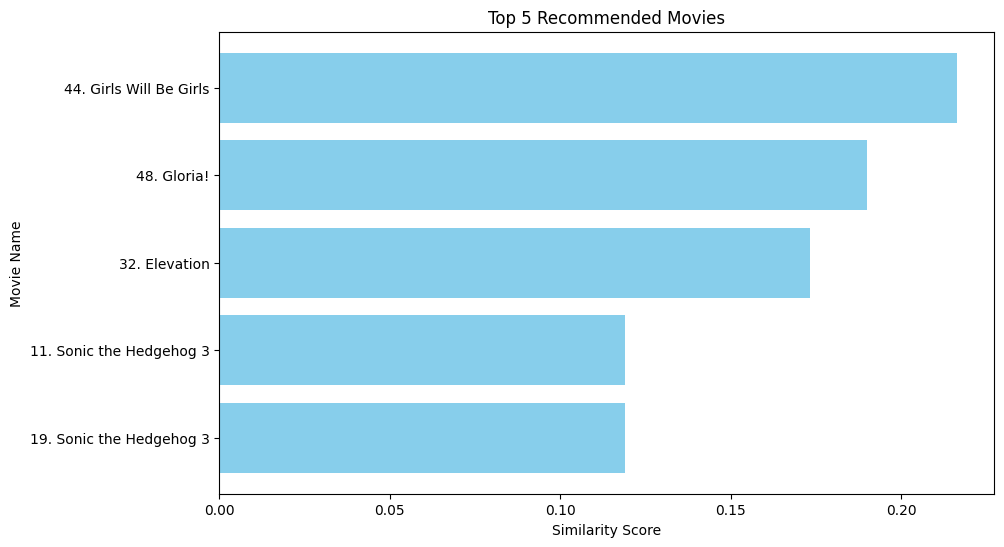

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("genre_movies.csv")

# Vectorizer
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df["Summary"].fillna(""))

# Function to recommend movies
def recommend_movies(user_input, top_n=5):
    user_vec = vectorizer.transform([user_input])
    similarity = cosine_similarity(user_vec, tfidf_matrix).flatten()
    top_indices = similarity.argsort()[-top_n:][::-1]

    results = df.iloc[top_indices][["Movie Name", "Summary"]].copy()
    results["Score"] = similarity[top_indices]
    return results


# Example user input
user_input = "A young boy discovers he has magical powers and attends a school of wizardry."
recommendations = recommend_movies(user_input)

print("\nTop 5 Recommended Movies:\n")
for i, row in recommendations.iterrows():
    print(f"{row['Movie Name']} - Score: {row['Score']:.3f}")
    print(f"Storyline: {row['Summary']}\n")

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.barh(recommendations["Movie Name"], recommendations["Score"], color="skyblue")
plt.gca().invert_yaxis()  # highest score on top
plt.title("Top 5 Recommended Movies")
plt.xlabel("Similarity Score")
plt.ylabel("Movie Name")
plt.show()
